In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from diabetes_classifier.data.process_data import process_data
from diabetes_classifier.data.schema import SCHEMA, DataType
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("darkgrid")

[Diabetes Dataset](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators)

In [3]:
data = pd.read_csv(os.path.join("data", "processed", "diabetes.csv"))

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes              253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [5]:
print(data.columns)

Index(['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [6]:
to_describe_at_once = 5
cols = data.columns

In [7]:
i=0
num_cols = len(cols)
while i*to_describe_at_once <= num_cols:
    upper_col_num_bound = min(num_cols, (i+1)*to_describe_at_once)
    cols_this_iter = cols[i*to_describe_at_once:upper_col_num_bound]
    display(data[cols_this_iter].describe())
    for col in cols_this_iter:
        print(f"{col}'s unique values: {data[col].unique()}")
    i = i+1

,Diabetes,HighBP,HighChol,CholCheck,BMI
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364
std,0.346294,0.494934,0.494210,0.189571,6.608694
min,0.000000,0.000000,0.000000,0.000000,12.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000


Diabetes's unique values: [0 1]
HighBP's unique values: [1 0]
HighChol's unique values: [1 0]
CholCheck's unique values: [1 0]
BMI's unique values: [40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78]


,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.443169,0.040571,0.094186,0.756544,0.634256
std,0.496761,0.197294,0.292087,0.429169,0.481639
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


Smoker's unique values: [1 0]
Stroke's unique values: [0 1]
HeartDiseaseorAttack's unique values: [0 1]
PhysActivity's unique values: [0 1]
Fruits's unique values: [0 1]


,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.811420,0.056197,0.951053,0.084177,2.511392
std,0.391175,0.230302,0.215759,0.277654,1.068477
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,1.000000,0.000000,2.000000
50%,1.000000,0.000000,1.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,5.000000


Veggies's unique values: [1 0]
HvyAlcoholConsump's unique values: [0 1]
AnyHealthcare's unique values: [1 0]
NoDocbcCost's unique values: [0 1]
GenHlth's unique values: [5 3 2 4 1]


,MentHlth,PhysHlth,DiffWalk,Sex,Age
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,3.184772,4.242081,0.168224,0.440342,8.032119
std,7.412847,8.717951,0.374066,0.496429,3.054220
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,6.000000
50%,0.000000,0.000000,0.000000,0.000000,8.000000
75%,2.000000,3.000000,0.000000,1.000000,10.000000
max,30.000000,30.000000,1.000000,1.000000,13.000000


MentHlth's unique values: [18  0 30  3  5 15 10  6 20  2 25  1  4  7  8 21 14 26 29 16 28 11 12 24
 17 13 27 19 22  9 23]
PhysHlth's unique values: [15  0 30  2 14 28  7 20  3 10  1  5 17  4 19  6 12 25 27 21 22  8 29 24
  9 16 18 23 13 26 11]
DiffWalk's unique values: [1 0]
Sex's unique values: [0 1]
Age's unique values: [ 9  7 11 10  8 13  4  6  2 12  5  1  3]


,Education,Income
count,253680.000000,253680.000000
mean,5.050434,6.053875
std,0.985774,2.071148
min,1.000000,1.000000
25%,4.000000,5.000000
50%,5.000000,7.000000
75%,6.000000,8.000000
max,6.000000,8.000000


Education's unique values: [4 6 3 5 2 1]
Income's unique values: [3 1 8 6 4 7 2 5]


In [8]:
data = process_data(df_raw = data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes              253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

<Figure size 640x480 with 0 Axes>

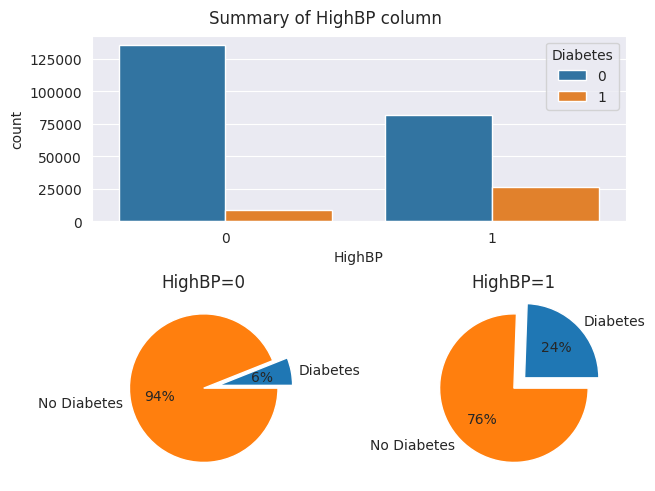

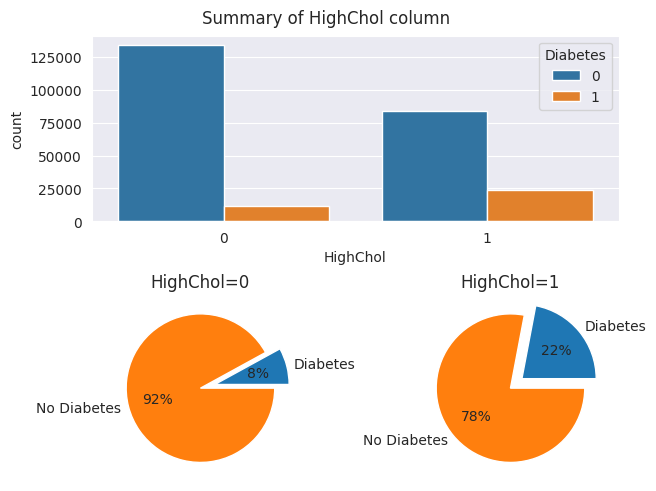

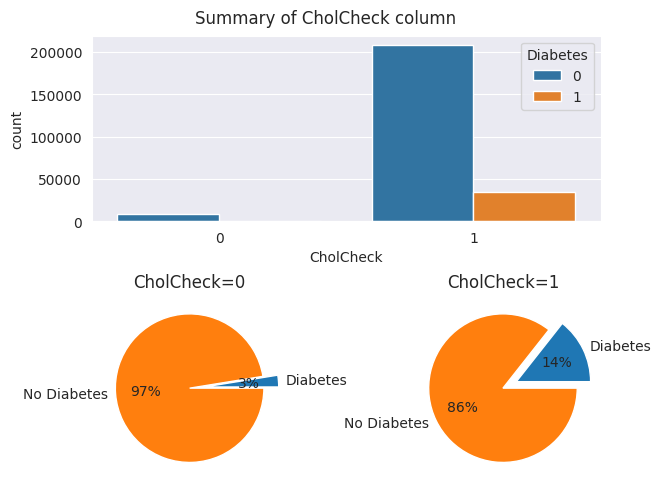

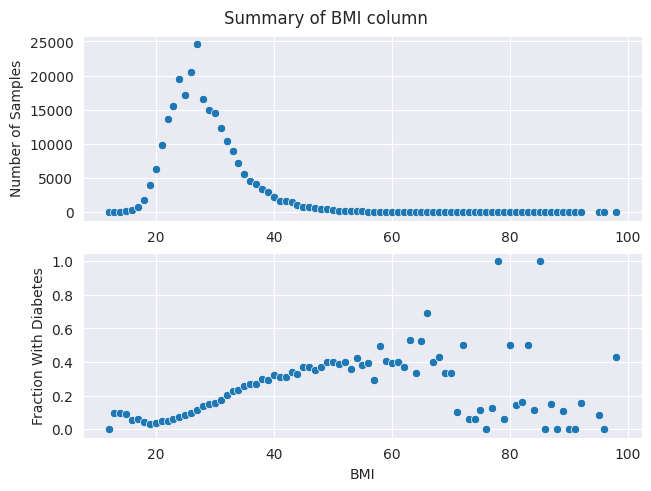

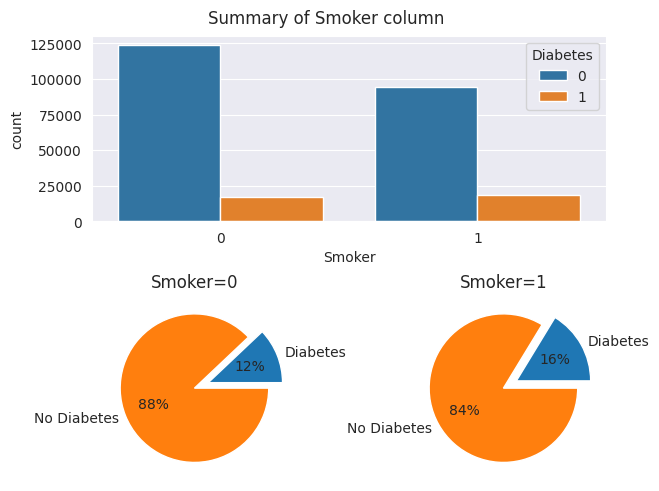

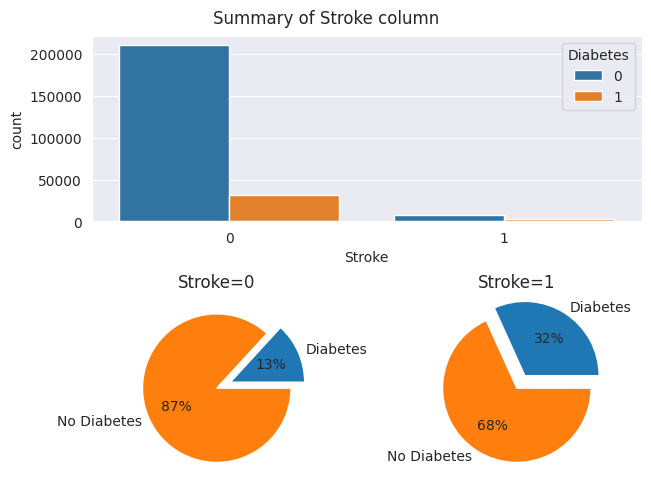

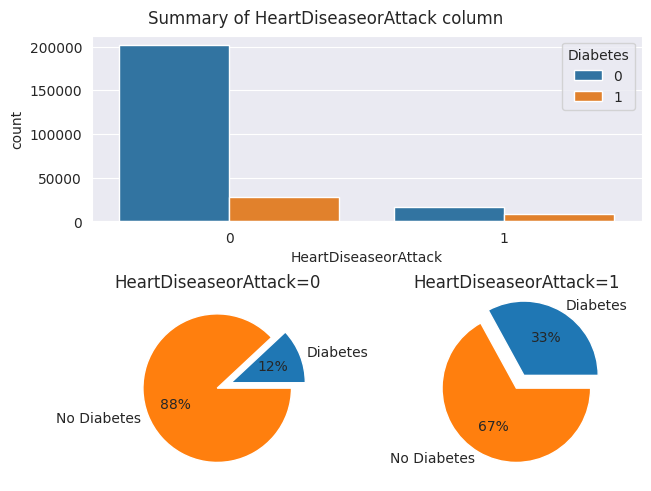

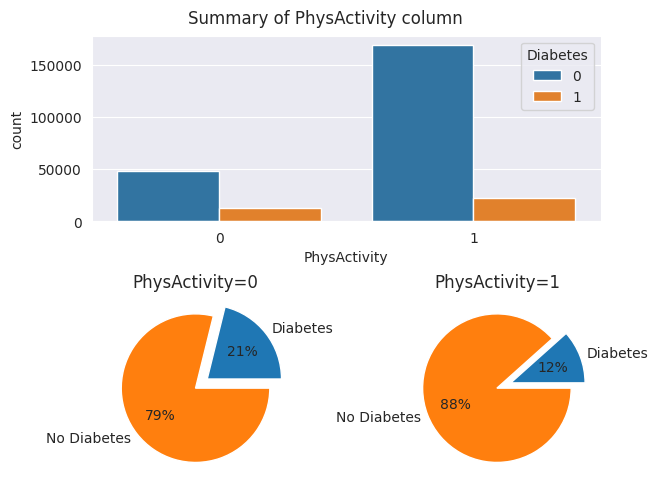

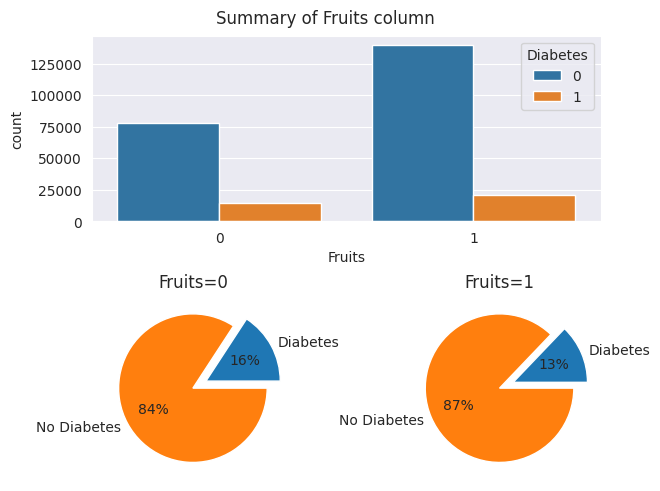

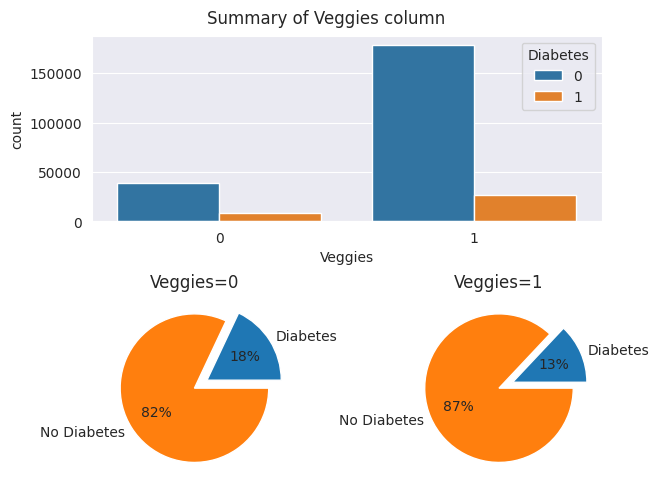

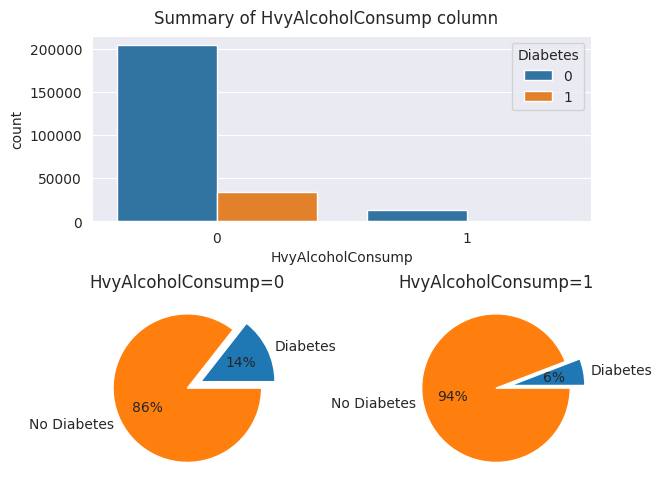

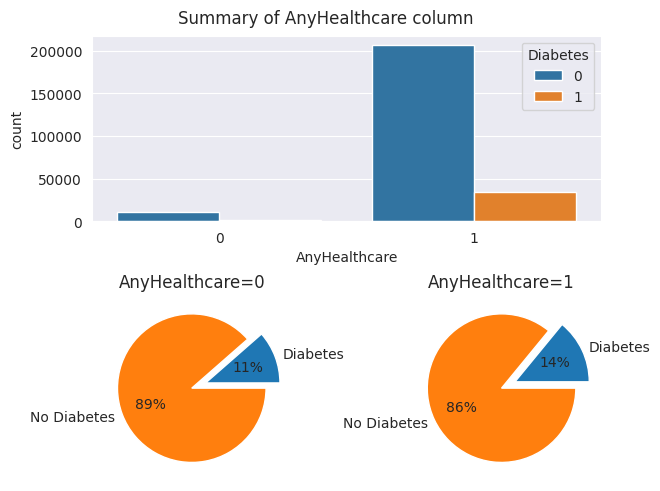

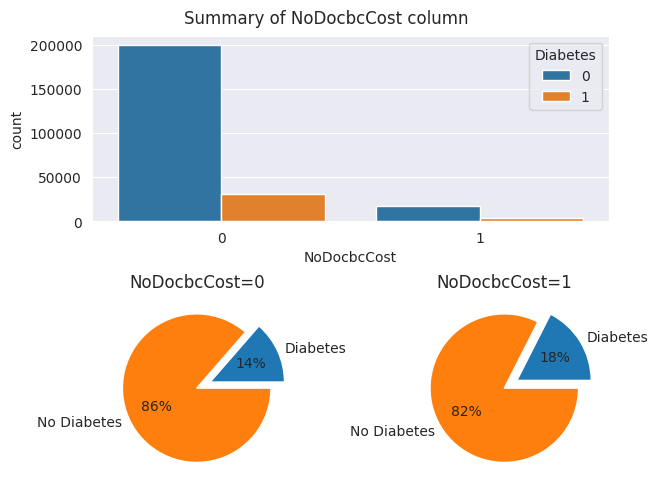

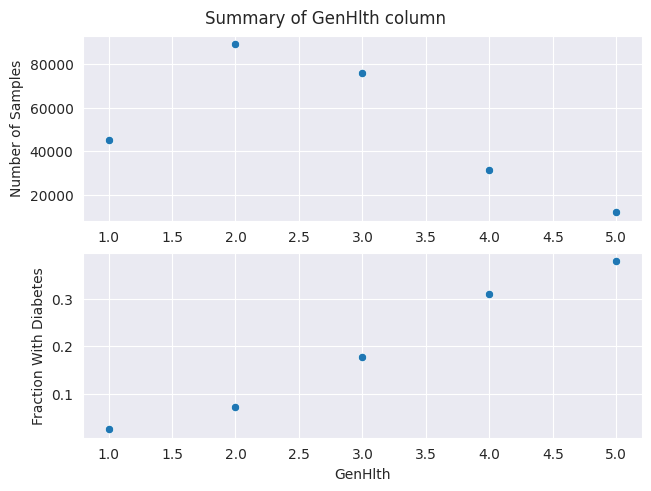

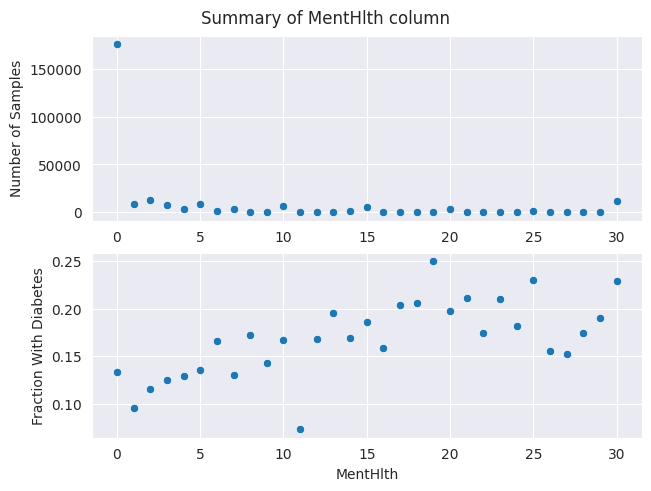

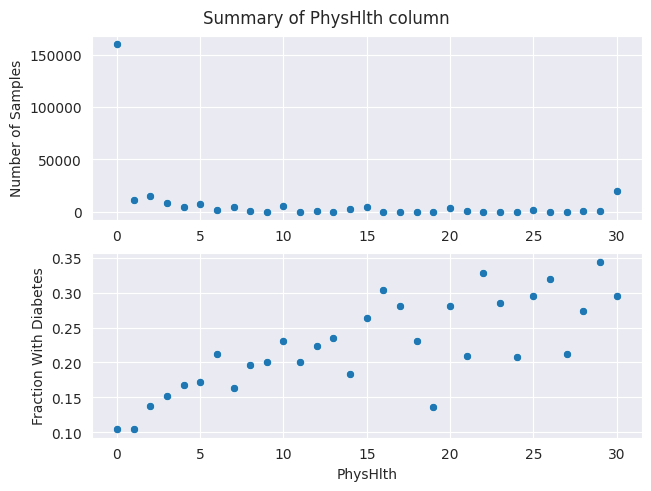

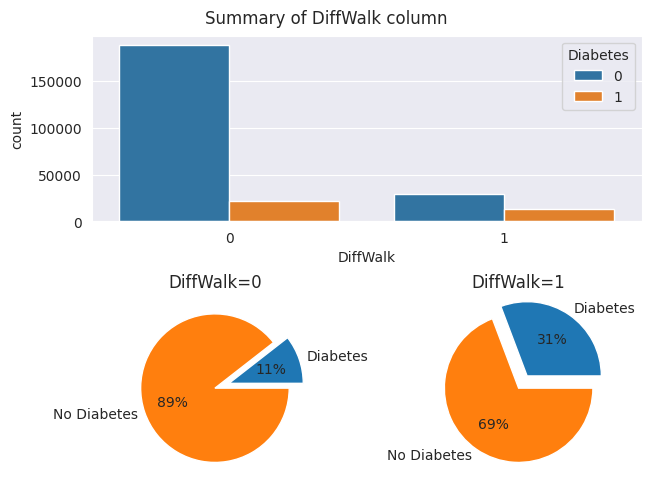

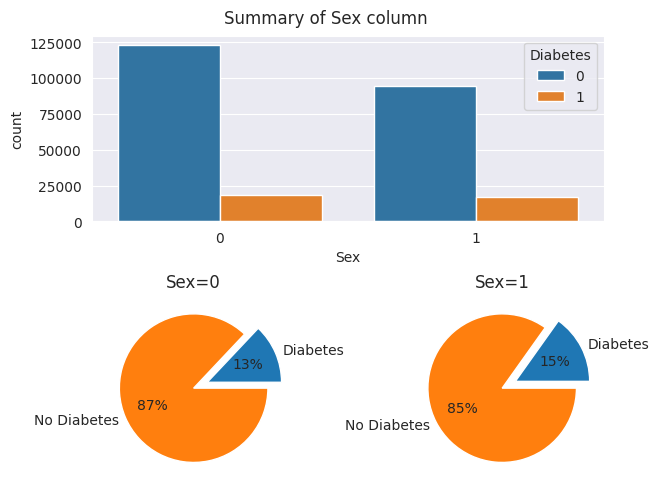

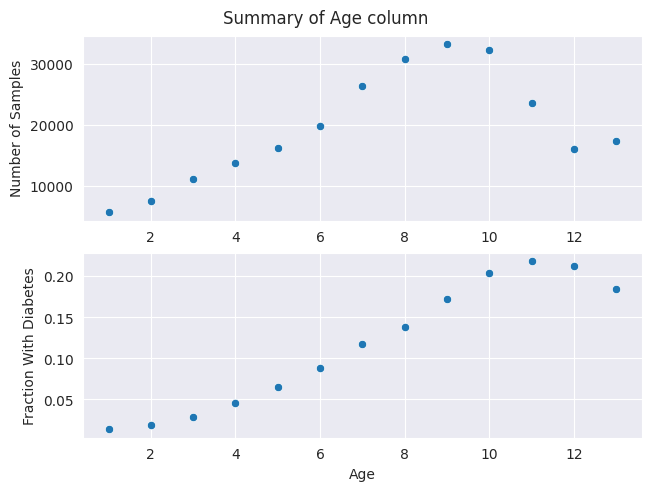

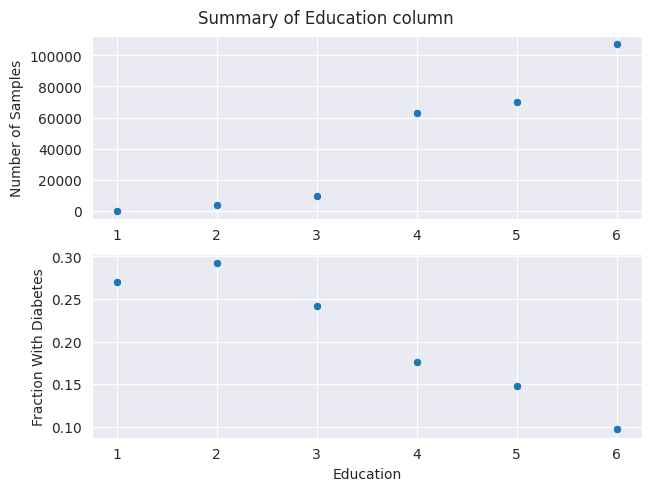

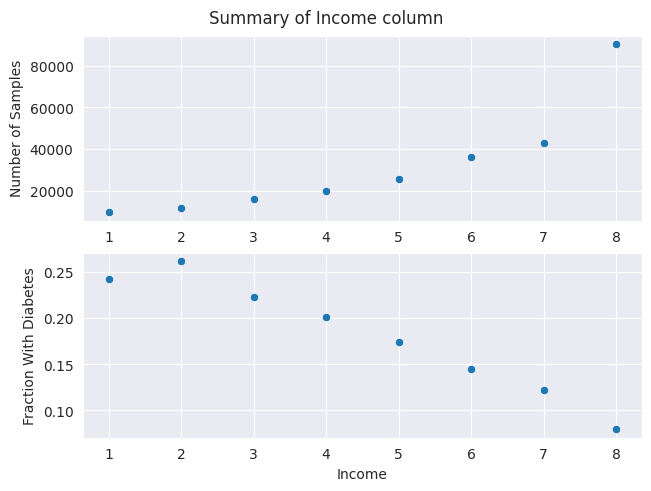

In [25]:
from diabetes_classifier.plotting import plot_binary_col, plot_numerical_cols

for col in data.columns:
    unique_values = list(data[col].unique())
    is_binary = len(unique_values) == 2
    if is_binary and col != "Diabetes":
        plot_binary_col(data=data, col=col)
    elif col != "Diabetes":
        plot_numerical_cols(data=data, col=col)
    plt.suptitle(f"Summary of the {col} column")
    plt.show()
    plt.close("all")